In [56]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

import numpy as np
df = pd.read_csv("file:///home/ishammahajan/Downloads/FIFA 2018 Statistics.csv", parse_dates=['Date'])
print(df)


          Date            Team        Opponent  Goal Scored  \
0   2018-06-14          Russia    Saudi Arabia            5   
1   2018-06-14    Saudi Arabia          Russia            0   
2   2018-06-15           Egypt         Uruguay            0   
3   2018-06-15         Uruguay           Egypt            1   
4   2018-06-15         Morocco            Iran            0   
5   2018-06-15            Iran         Morocco            1   
6   2018-06-15        Portugal           Spain            3   
7   2018-06-15           Spain        Portugal            3   
8   2018-06-16          France       Australia            2   
9   2018-06-16       Australia          France            1   
10  2018-06-16       Argentina         Iceland            1   
11  2018-06-16         Iceland       Argentina            1   
12  2018-06-16            Peru         Denmark            0   
13  2018-06-16         Denmark            Peru            1   
14  2018-06-17         Croatia         Nigeria         

In [57]:
#Cleaning dataset
df["Own goals"].fillna(0, inplace = True) 
df["Own goal Time"].fillna(200, inplace = True)
df["Own goal Time"].apply(lambda x: 1 if x <= 120 else 0)
df['Own goal Time'] = df['Own goal Time'].apply(lambda x: 1 if x <= 120 else 0)

df['1st Goal'].fillna(0, inplace = True)
df['1stGoal1sthalf'] = df['1st Goal'].apply(lambda x: 1 if 0.0<x<=45.0 else 0)
df['1stGoal2ndhalf'] = df['1st Goal'].apply(lambda x: 1 if 45.0<x<=120.0 else 0)

df['Man of the Match'] = df['Man of the Match'].apply(lambda x: 1 if x=='Yes' else 0)
# Inferences are drawn only on match stats and are irrespective of team/date columns. Hence dropping them.
df = df.drop(['Round', 'PSO', 'Team', 'Opponent', 'Date'], axis=1) 


In [58]:
print(df)

     Goal Scored  Ball Possession %  Attempts  On-Target  Off-Target  Blocked  \
0              5                 40        13          7           3        3   
1              0                 60         6          0           3        3   
2              0                 43         8          3           3        2   
3              1                 57        14          4           6        4   
4              0                 64        13          3           6        4   
5              1                 36         8          2           5        1   
6              3                 39         8          3           2        3   
7              3                 61        12          5           5        2   
8              2                 51        12          5           4        3   
9              1                 49         4          1           2        1   
10             1                 72        26          7           9       10   
11             1            

In [59]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Goal Scored,128.0,1.320312,1.156519,0.0,0.00,1.0,2.00,6.0
Ball Possession %,128.0,49.992188,10.444074,25.0,42.00,50.0,58.00,75.0
Attempts,128.0,12.593750,5.245827,3.0,9.00,12.0,15.00,26.0
On-Target,128.0,3.914062,2.234403,0.0,2.00,3.5,5.00,12.0
Off-Target,128.0,5.273438,2.409675,1.0,4.00,5.0,7.00,11.0
Blocked,128.0,3.359375,2.403195,0.0,1.75,3.0,4.00,10.0
Corners,128.0,4.718750,2.446072,0.0,3.00,5.0,6.00,11.0
Offsides,128.0,1.343750,1.193404,0.0,0.00,1.0,2.00,5.0
Free Kicks,128.0,14.890625,4.724262,5.0,11.00,15.0,18.00,26.0
Saves,128.0,2.726562,2.049447,0.0,1.00,2.0,4.00,9.0


In [60]:

df[:10][['1stGoal1sthalf','1stGoal2ndhalf','1st Goal']]

,1stGoal1sthalf,1stGoal2ndhalf,1st Goal
0,1,0,12.0
1,0,0,0.0
2,0,0,0.0
3,0,1,89.0
4,0,0,0.0
5,0,1,90.0
6,1,0,4.0
7,1,0,24.0
8,0,1,58.0
9,0,1,62.0


In [61]:
df[:10][['Ball Possession %','Passes']]

,Ball Possession %,Passes
0,40,306
1,60,511
2,43,395
3,57,589
4,64,433
5,36,194
6,39,366
7,61,727
8,51,484
9,49,390


In [62]:
df['Ball Possession %'].corr(df['Passes'])

0.8806108565261558

In [63]:
potentialFeatures  = ['Ball Possession %', 'Distance Covered (Kms)', 'Passes', '1stGoal1sthalf', '1stGoal2ndhalf', 'Attempts','On-Target','Saves']

for fc in potentialFeatures:
    related = df['Goal Scored'].corr(df[fc])
    print(fc,':',related)

Ball Possession % : 0.034758909544131106
Distance Covered (Kms) : 0.014355189277139812
Passes : 0.04397085868620009
1stGoal1sthalf : 0.46281525780023963
1stGoal2ndhalf : 0.1490549923987464
Attempts : 0.14491470805249412
On-Target : 0.4617019485000427
Saves : -0.11889319088026964


In [64]:
correlation_matrix  = df.corr()
#print(correlation_matrix)
correlation_matrix["Goal Scored"].sort_values(ascending=False)

Goal Scored               1.000000
Man of the Match          0.522193
1stGoal1sthalf            0.462815
On-Target                 0.461702
1st Goal                  0.278268
1stGoal2ndhalf            0.149055
Attempts                  0.144915
Pass Accuracy %           0.135688
Free Kicks                0.046815
Offsides                  0.045105
Passes                    0.043971
Corners                   0.040446
Ball Possession %         0.034759
Fouls Committed           0.030331
Distance Covered (Kms)    0.014355
Goals in PSO             -0.011204
Off-Target               -0.020374
Yellow & Red             -0.035031
Yellow Card              -0.048838
Own goals                -0.066164
Own goal Time            -0.066164
Blocked                  -0.087072
Red                      -0.089714
Saves                    -0.118893
Name: Goal Scored, dtype: float64

In [65]:
correlation_matrix  = df.corr()
correlation_matrix["Goal Scored"].sort_values(ascending=False)


Goal Scored               1.000000
Man of the Match          0.522193
1stGoal1sthalf            0.462815
On-Target                 0.461702
1st Goal                  0.278268
1stGoal2ndhalf            0.149055
Attempts                  0.144915
Pass Accuracy %           0.135688
Free Kicks                0.046815
Offsides                  0.045105
Passes                    0.043971
Corners                   0.040446
Ball Possession %         0.034759
Fouls Committed           0.030331
Distance Covered (Kms)    0.014355
Goals in PSO             -0.011204
Off-Target               -0.020374
Yellow & Red             -0.035031
Yellow Card              -0.048838
Own goals                -0.066164
Own goal Time            -0.066164
Blocked                  -0.087072
Red                      -0.089714
Saves                    -0.118893
Name: Goal Scored, dtype: float64

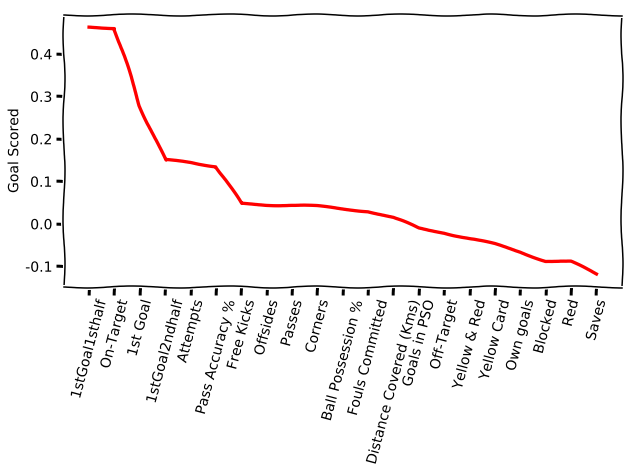

In [66]:
columns = ['1stGoal1sthalf',           
'On-Target'     ,            
'1st Goal'       ,           
'1stGoal2ndhalf'  ,          
'Attempts'         ,         
'Pass Accuracy %'   ,        
'Free Kicks'         ,       
'Offsides'            ,      
'Passes'               ,     
'Corners'               ,    
'Ball Possession %'      ,   
'Fouls Committed'         ,  
'Distance Covered (Kms)'   , 
'Goals in PSO'             ,
'Off-Target'               ,
'Yellow & Red'             ,
'Yellow Card'              ,
'Own goals'                ,
'Blocked'                  ,
'Red'                      ,
'Saves'  ]

correlations = [ df['Goal Scored'].corr(df[f]) for f in columns ]


def plot_dataframe(df, y_label):  
    color='red'
    fig = plt.gcf()
    fig.set_size_inches(10, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75); 
    plt.show()
    
df1 = pd.DataFrame({'attributes': columns, 'correlation': correlations})

plot_dataframe(df1, 'Goal Scored')
plt.xkcd()

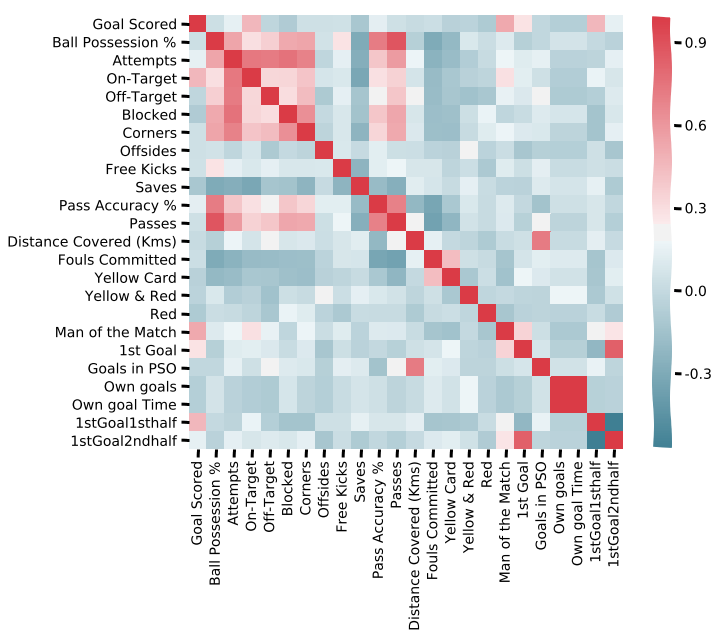

In [67]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()



In [74]:
from sklearn.preprocessing import StandardScaler

# Standardizing all properties which may affect the presumed target of Goals scored.

x = df.values
y = df.loc[:,'Goal Scored'].values
z = StandardScaler().fit_transform(x)

zDf = pd.DataFrame(z)

In [76]:
zDf.corr().style.background_gradient()
# Standardizing the dataset doesn't make a difference in the correlation matrix, however it does make the algorithm
# learning better.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1,0.0347589,0.144915,0.461702,-0.020374,-0.0870721,0.0404461,0.0451052,0.0468149,-0.118893,0.135688,0.0439709,0.0143552,0.0303312,-0.0488382,-0.0350311,-0.0897138,0.522193,0.278268,-0.0112042,-0.066164,-0.066164,0.462815,0.149055
1,0.0347589,1,0.541185,0.297234,0.361767,0.52151,0.542992,0.0577056,0.273831,-0.293658,0.713872,0.880611,-0.0590544,-0.296477,-0.205511,0.0909235,0.0243157,0.110393,-0.0646954,-0.0100861,0.0594988,0.0594988,-0.000879108,-0.0464788
2,0.144915,0.541185,1,0.731243,0.718972,0.754307,0.686892,-0.016508,0.14085,-0.268217,0.397614,0.582831,0.171381,-0.248773,-0.185544,-0.074594,0.00979518,0.176425,0.116862,0.149836,-0.0416767,-0.0416767,-0.0304637,0.13951
3,0.461702,0.297234,0.731243,1,0.324672,0.331333,0.407576,0.0731763,0.0930903,-0.321557,0.291659,0.348099,0.0654752,-0.192242,-0.115259,-0.0517425,-0.0234389,0.291346,0.128256,0.040322,-0.0718796,-0.0718796,0.16803,0.0790436
4,-0.020374,0.361767,0.718972,0.324672,1,0.299712,0.440633,-0.0959193,0.142367,-0.126644,0.18976,0.398949,0.22993,-0.186858,-0.124094,-0.145577,-0.119332,0.152979,0.0979934,0.185807,-0.0924743,-0.0924743,-0.0709531,0.112794
5,-0.0870721,0.52151,0.754307,0.331333,0.299712,1,0.636172,-0.00223071,0.086021,-0.14296,0.401699,0.532913,0.0821113,-0.174606,-0.163111,0.0337169,0.165295,-0.0195819,0.0188492,0.10822,0.0748787,0.0748787,-0.134854,0.0888944
6,0.0404461,0.542992,0.686892,0.407576,0.440633,0.636172,1,-0.0340542,0.0852158,-0.233787,0.330363,0.524661,0.0997002,-0.165382,-0.169929,0.0145431,0.11796,0.173148,0.103295,0.088997,-0.0288764,-0.0288764,-0.135128,0.140084
7,0.0451052,0.0577056,-0.016508,0.0731763,-0.0959193,-0.00223071,-0.0340542,1,0.0891211,0.00653936,0.127421,0.0347152,0.0313239,-0.0400844,-0.0477565,0.228531,-0.0364324,0.0262885,-0.125407,-0.0648922,-0.0704606,-0.0704606,0.0457452,-0.124066
8,0.0468149,0.273831,0.14085,0.0930903,0.142367,0.086021,0.0852158,0.0891211,1,-0.231637,0.131951,0.175695,0.076927,0.0803409,-0.0267409,0.0297014,-0.104164,0.119534,0.0390472,0.138046,0.0188671,0.0188671,0.040025,0.0228338
9,-0.118893,-0.293658,-0.268217,-0.321557,-0.126644,-0.14296,-0.233787,0.00653936,-0.231637,1,-0.19074,-0.264425,0.125645,0.0749756,0.0096697,0.140307,0.0168754,-0.0344428,-0.0454246,0.110014,0.0693399,0.0693399,0.145418,-0.0913373


In [84]:
# Combining all features which are highly correlated.
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [1, 2, 3, 4, 5, 6, 7, 8])
principalDf.corr().style.background_gradient()

,1,2,3,4,5,6,7,8
1,1,-9.71894e-17,-2.45557e-16,5.89649e-17,3.97062e-16,-1.41162e-16,-2.30474e-16,2.89446e-16
2,-9.71894e-17,1,-5.87274e-16,3.24593e-16,-4.21571e-16,-2.97126e-16,-4.69232e-17,-3.52037e-16
3,-2.45557e-16,-5.87274e-16,1,1.5843e-17,-3.43056e-16,2.0148e-17,1.32168e-16,1.39783e-16
4,5.89649e-17,3.24593e-16,1.5843e-17,1,-5.61629e-17,7.14931e-17,2.60935e-17,2.76193e-16
5,3.97062e-16,-4.21571e-16,-3.43056e-16,-5.61629e-17,1,3.4879e-16,-2.59058e-16,-3.58845e-16
6,-1.41162e-16,-2.97126e-16,2.0148e-17,7.14931e-17,3.4879e-16,1,-3.27911e-16,-2.67326e-16
7,-2.30474e-16,-4.69232e-17,1.32168e-16,2.60935e-17,-2.59058e-16,-3.27911e-16,1,-1.44453e-16
8,2.89446e-16,-3.52037e-16,1.39783e-16,2.76193e-16,-3.58845e-16,-2.67326e-16,-1.44453e-16,1


In [98]:
# Using RandomForestClassifier() as opposed to pca analysis
# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

X = zDf
df['Goal Scored'] = df['Goal Scored'].apply(lambda x: 0 if 0.0<x<=1.0 else 1)
#zDf = zDf.iloc[:, 0].astype(np.int64)
Y = zDf[('Goal Scored')]
names = zDf.columns.values

rfc = RandomForestClassifier()

rfc.fit(X, Y)

print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))

KeyError: 'Goal Scored'